<a href="https://colab.research.google.com/github/racheltu2020/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module4-clustering/LS_DS_134_Clustering_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering

# 1) Use the "Breast Cancer Wisconsin (Diagnostic) Data Set" from Kaggle to try and cluster types of cancer cells. 

Here's the original dataset for your reference:

<https://www.kaggle.com/uciml/breast-cancer-wisconsin-data>

## This is a supervised learning dataset

(Because it has **labels** - The "diagnosis" column.)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA # You don't necessarily have to use this
from sklearn.cluster import KMeans # You don't necessarily have to use this
from sklearn.preprocessing import StandardScaler # You don't necessarily have to use this

df = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/Cancer_Cells.csv")
print(df.shape)
df.head()
#df.info()
df.columns

(569, 33)


Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [3]:
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

## Now it's an unsupervised learning dataset

(Because we've removed the diagnosis label) - Use this version.

In [4]:
# id is not related to the whole data set
# and  'Unnamed: 32' column
# need to drop 'id', 'Unnamed: 32' two columns 
df = df.drop(['id', 'Unnamed: 32'], axis=1)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
# df = df.replace({'M' : 1, 'B' : 0})
df.tail()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.256,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.463,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.075,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.595,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.00466,0.00000,0.00000,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [0]:
unsupervised_data = df.drop('diagnosis', axis=1)

In [7]:
# based on raw_data's corr report, we found following columns have higher corr values
# radius_mean, perimeter_mean,	area_mean, concavity_mean,, compactness_mean,	
# concave points_mean, perimeter_se,	area_se


# Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
#        'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
#        'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
#        'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
#        'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
#        'fractal_dimension_se', 'radius_worst', 'texture_worst',
#        'perimeter_worst', 'area_worst', 'smoothness_worst',
#        'compactness_worst', 'concavity_worst', 'concave points_worst',
#        'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
#       dtype='object')

highly_related = df[['diagnosis', 'radius_mean', 'perimeter_mean',	'area_mean', 'concavity_mean', 
                     'compactness_mean',	'concave points_mean', 'perimeter_se',
                     'area_se']]
highly_related = highly_related.replace({'M':1, 'B':0})
highly_related.head()
#highly_related.shape                    

,diagnosis,radius_mean,perimeter_mean,area_mean,concavity_mean,compactness_mean,concave points_mean,perimeter_se,area_se
0,1,17.99,122.80,1001.0,0.3001,0.27760,0.14710,8.589,153.40
1,1,20.57,132.90,1326.0,0.0869,0.07864,0.07017,3.398,74.08
2,1,19.69,130.00,1203.0,0.1974,0.15990,0.12790,4.585,94.03
3,1,11.42,77.58,386.1,0.2414,0.28390,0.10520,3.445,27.23
4,1,20.29,135.10,1297.0,0.1980,0.13280,0.10430,5.438,94.44


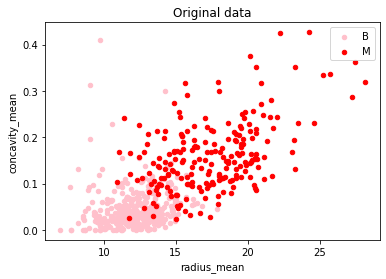

In [8]:
# let's plot the original scattering on 'radius_mean', 'concavity_mean' first
# based on diagnosis, it it not unsupervised learning
fig, ax = plt.subplots()
colors = {'M':'red', 'B':'pink'}
grouped = df.groupby('diagnosis')

for key, group in grouped:
  group.plot(ax=ax, kind='scatter', x='radius_mean', y='concavity_mean', label=key, color=colors[key])
plt.title('Original data')
plt.show()   

In [9]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(highly_related)
print(kmeans.labels_)
highly_related['clusters'] = kmeans.labels_

# write to highly_related DataFrame KMeans reported back clusters

[1 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 1 1 0 1 1 0 1 0
 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0
 0 0 0 1 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 1 0 0
 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 1 1 

In [10]:
highly_related.head()

,diagnosis,radius_mean,perimeter_mean,area_mean,concavity_mean,compactness_mean,concave points_mean,perimeter_se,area_se,clusters
0,1,17.99,122.80,1001.0,0.3001,0.27760,0.14710,8.589,153.40,1
1,1,20.57,132.90,1326.0,0.0869,0.07864,0.07017,3.398,74.08,1
2,1,19.69,130.00,1203.0,0.1974,0.15990,0.12790,4.585,94.03,1
3,1,11.42,77.58,386.1,0.2414,0.28390,0.10520,3.445,27.23,0
4,1,20.29,135.10,1297.0,0.1980,0.13280,0.10430,5.438,94.44,1


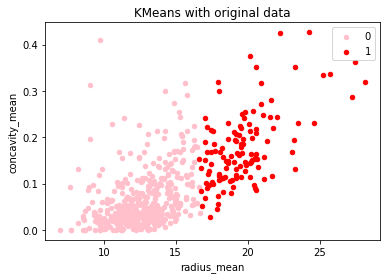

In [14]:
# plot after KMeans feed with raw data without standardized 

fig, ax = plt.subplots()
colors = {1:'red', 0:'pink'}
grouped = highly_related.groupby('clusters')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='radius_mean', y='concavity_mean', label=key, color=colors[key])
plt.title('KMeans with original data')
plt.show()

In [17]:
# check the KMeans return how much accuracy
print((highly_related['clusters']==highly_related['diagnosis']).value_counts(), '\n')
print('highly_related[\'clusters\']==highly_related[\'diagnosis\']).value_counts()[0] = ', 
    (highly_related['clusters']==highly_related['diagnosis']).value_counts()[0])
print('\n')
print('Accuracy rate = ')
(highly_related['clusters']==highly_related['diagnosis']).value_counts()[1] / len(df)

True     475
False     94
dtype: int64 

highly_related['clusters']==highly_related['diagnosis']).value_counts()[0] =  94


Accuracy rate = 


0.8347978910369068

## Let's do it!

- You might want to do some data exploration to see if you can find specific columns that will help you find distinct clusters of cells
- You might want to use the elbow method to decide on the number of clusters to use.


## Check you work: 

This is something that in a truly unsupervised learning situation **WOULD NOT BE POSSIBLE**. But for educational purposes go back and grab the true diagnosis column (label) from the original dataset. Take your cluster labels and compare them to the original diagnosis column. You can make scatterplots for each to see how they compare or you can calculate a percent accuracy score like: 
\begin{align}
\frac{\text{Num Correct Labels}}{\text{Num Total Observations}}
\end{align}

In [0]:
# Your Code Here

# 2) Perform PCA on your dataset first and *then* use k-means clustering. 

- You need to standardize your data before PCA.
- First try clustering just on PC1 and PC2 so that you can make a scatterplot of your clustering.
- Then use use a scree plot to decide how many principal components to include in your clustering, and use however many principal components you need in order to retain 90% of the variation of the original dataset



In [18]:
##### Your Code Here #####

#df.info()
df_wo_diag = df.drop('diagnosis', axis=1)
df_wo_diag.head()
df_wo_diag.shape

# we drop 3 columns, id, diagnosis, Unnamed: 32

(569, 30)

In [19]:
# PCA steps :

# 1. scaler = StandardScaler() 
# 2. stdzed_data = scaler.fit_transform(df)
# 3. pca = PCA(0.9)
# 4. pca_data = pca.fit_trannsform(stdzed_data)
# 5  pca_data = pd.DataFrame(pca_data)


scaler = StandardScaler()
stdzed_data = scaler.fit_transform(df_wo_diag) 

stdzed_data

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [20]:
# grap 90% of the major important items while through PCA
pca = PCA(.9)
pca_data = pca.fit_transform(stdzed_data)

pca_data = pd.DataFrame(pca_data)

pca_data.head()

,0,1,2,3,4,5,6
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159370
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013358
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668166
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429911
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936213


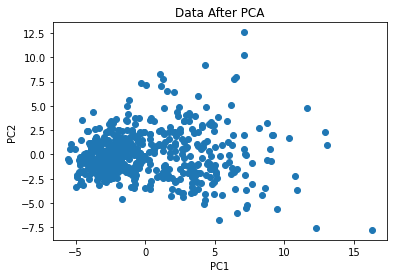

In [21]:
plt.scatter(pca_data[0], pca_data[1])

plt.title("Data After PCA")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [0]:
# Define scree plot function
def scree_plot(pca):
    '''
    Creates a scree plot associated with the principal components 
    
    INPUT: pca - the result of instantian of PCA in scikit learn
            
    OUTPUT:
            None
    '''
    num_components=len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(18, 6))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
    for i in range(num_components):
        ax.annotate(r"%s" % ((str(vals[i]*100)[:3])), (ind[i], vals[i]), va="bottom", ha="center", fontsize=10)
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)
 
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')

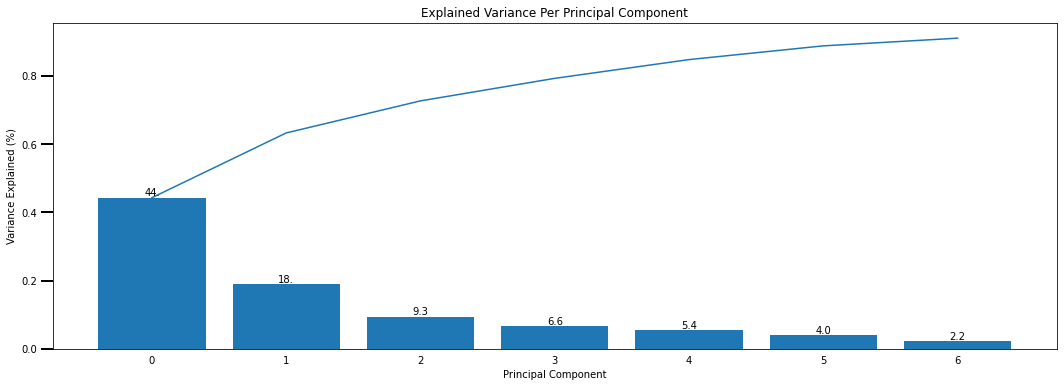

In [23]:
scree_plot(pca) # at 90% variance explained

# After PCA, its explained varience as following percentage
# PC1 : 44%
# PC2 : 18% (62% by PC1 + PC2)
# PC2 : 9.3%

In [27]:
# After PCA, next go to KMeans 
kmeans = KMeans(n_clusters=2)
kmeans.fit(pca_data)
print(kmeans.labels_)
highly_related['clusters_after_pca'] = kmeans.labels_

[1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 1 0 0 1 0 1 0 1 0
 0 1 0 1 1 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0
 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 1 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0
 0 0 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 0 0 0 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 1 1 0 1 1 1
 1 1 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0
 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 1 0 1 0 0 0 0 1 

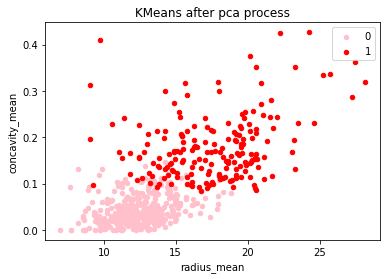

In [28]:
fig, ax = plt.subplots()
colors = {1:'red', 0:'pink'}
grouped = highly_related.groupby('clusters_after_pca')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='radius_mean', y='concavity_mean', label=key, color=colors[key])
plt.title('KMeans after pca process')
plt.show()

In [29]:
# KMean by raw data
(highly_related['clusters']==highly_related['diagnosis']).value_counts()

True     475
False     94
dtype: int64

In [30]:
#PCA, standardized data, and 90% of explained variance clustering.
(highly_related['clusters_after_pca']==highly_related['diagnosis']).value_counts()

True     518
False     51
dtype: int64

In [33]:
print('KMeans with raw data :')
print((highly_related['clusters']==highly_related['diagnosis']).value_counts()[1]/len(df))
print('\n')
print('KMeans with PCA standardized & with 90% explained variance  :')
print((highly_related['clusters_after_pca']==highly_related['diagnosis']).value_counts()[1]/len(df))

KMeans with raw data :
0.8347978910369068


KMeans with PCA standardized & with 90% explained variance  :
0.9103690685413005


In [0]:
############
# PCA, KMeans, we got the rate of accuracy improved from 83.48% to 91.04%

In [34]:
average_distance_from_points_to_centroids = []

for k in range(1,11):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(pca_data)
  average_distance_from_points_to_centroids.append(kmeans.inertia_)

average_distance_from_points_to_centroids

[15535.326782893188,
 10062.438005641845,
 8534.851555471409,
 7744.648520662124,
 7045.144311279476,
 6477.994063540453,
 6053.281656815733,
 5706.245974060297,
 5469.185970287982,
 5186.761185151927]

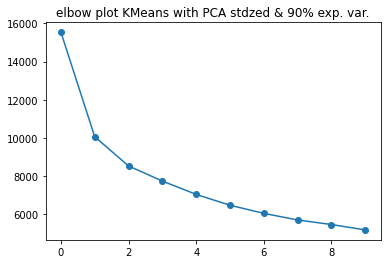

In [36]:
plt.plot(average_distance_from_points_to_centroids, marker='o')
plt.title("elbow plot KMeans with PCA stdzed & 90% exp. var.")
plt.show()

In [37]:
average_distance_from_points_to_centroids = []

for k in range(1,11):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(df_wo_diag)
  average_distance_from_points_to_centroids.append(kmeans.inertia_)

average_distance_from_points_to_centroids

[256677243.9542025,
 77943099.87829883,
 47336610.421990566,
 29226541.651979793,
 20539877.62210288,
 16577430.286188873,
 13246985.693693068,
 11242204.826999879,
 9466539.934680246,
 8521228.325672936]

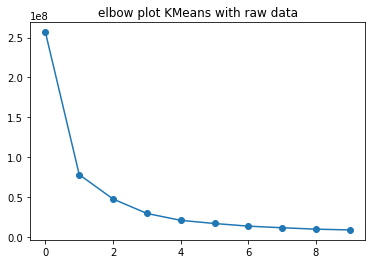

In [39]:
# directed raw data feed to KMeans
plt.plot(average_distance_from_points_to_centroids, marker='o')
plt.title("elbow plot KMeans with raw data")
plt.show()

In [0]:
########################
# from above 2 elbow plots, data span in y-axis range is magnitudely reduced. 
# and it's clear to say with PCA + KMeans, we can get better fitting result.

## Check your work: 

- Compare your PC1, PC2 clustering scatterplot to the clustering scatterplots you made on the raw data
- Calculate accuracy scores for both the PC1,PC2 Principal component clustering and the 90% of explained variance clustering.

How do your accuracy scores -when preprocessing the data with PCA- compare to the accuracy when simply clustering on the raw data?

# Stretch Goals:

- Study for the Sprint Challenge
- Work on your Data Storytelling Project